# Choose a regression dataset of your choice and perform the following.

## 1.Clean and prepare the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("brest_cancer_Dataset.csv")

In [3]:
df.head()

,Unnamed: 0,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,0,1000025,5,1,1,1,2,1,3,1,1,2
1,1,1002945,5,4,4,5,7,10,3,2,1,2
2,2,1015425,3,1,1,1,2,2,3,1,1,2
3,3,1016277,6,8,8,1,3,4,3,7,1,2
4,4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [5]:
print(df['class'].unique())

[2 4]


In [6]:
df.tail()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [7]:
df.index

RangeIndex(start=0, stop=699, step=1)

In [8]:
df.columns

Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   uniform_cell_size       699 non-null    int64 
 3   uniform_cell_shape      699 non-null    int64 
 4   marginal_adhesion       699 non-null    int64 
 5   single_epithelial_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chromatin         699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [10]:
df.describe()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [11]:
df["bare_nuclei"].replace(to_replace='?',value=np.nan,inplace=True)

In [12]:
df.isna().any()

id                        False
clump_thickness           False
uniform_cell_size         False
uniform_cell_shape        False
marginal_adhesion         False
single_epithelial_size    False
bare_nuclei                True
bland_chromatin           False
normal_nucleoli           False
mitoses                   False
class                     False
dtype: bool

In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().any()

id                        False
clump_thickness           False
uniform_cell_size         False
uniform_cell_shape        False
marginal_adhesion         False
single_epithelial_size    False
bare_nuclei               False
bland_chromatin           False
normal_nucleoli           False
mitoses                   False
class                     False
dtype: bool

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      683 non-null    int64 
 1   clump_thickness         683 non-null    int64 
 2   uniform_cell_size       683 non-null    int64 
 3   uniform_cell_shape      683 non-null    int64 
 4   marginal_adhesion       683 non-null    int64 
 5   single_epithelial_size  683 non-null    int64 
 6   bare_nuclei             683 non-null    object
 7   bland_chromatin         683 non-null    int64 
 8   normal_nucleoli         683 non-null    int64 
 9   mitoses                 683 non-null    int64 
 10  class                   683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [16]:
df['bare_nuclei'] = df['bare_nuclei'].astype(int)

## 2. Split the dataset in the ratio 70;30 for train-test split

In [17]:
X=df[['clump_thickness', 'uniform_cell_size','uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size',
 'bland_chromatin', 'normal_nucleoli', 'mitoses']]
y=df['class']

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
cols = X.columns
X = scaler.fit_transform(X)

In [20]:
X = pd.DataFrame(X,columns=cols)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [23]:
# Check train and test data shapes 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(478, 8)
(205, 8)
(478,)
(205,)


## 3. Build logistic regression model, KNN model, Naïve bayes model and Decision tree model

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [25]:
lr_pred = lr.predict(X_test) 
lr_pred

array([2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4,
       2, 2, 2, 4, 2, 2, 2], dtype=int64)

## KNN Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski') 
knn.fit(X_train, y_train) 

KNeighborsClassifier()

In [27]:
knn_pred = knn.predict(X_test)  
knn_pred

array([2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4,
       2, 2, 4, 4, 2, 2, 2], dtype=int64)

## Naïve bayes model

In [28]:
from sklearn.naive_bayes import GaussianNB  
nb = GaussianNB()  
nb.fit(X_train, y_train)

GaussianNB()

In [29]:
nb_pred = nb.predict(X_test)  
nb_pred

array([2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4,
       4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4,
       2, 2, 4, 4, 2, 2, 2], dtype=int64)

## Decision tree model

In [30]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier(criterion='entropy', random_state=101)  
dt.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [31]:
dt_pred = dt.predict(X_test)  
dt_pred

array([2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4,
       2, 2, 2, 4, 2, 2, 2], dtype=int64)

## 4. Print the confusion matrix, classification report and accuracy for each model

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Logistic Regression

Confusion Matrix: 



<AxesSubplot:>

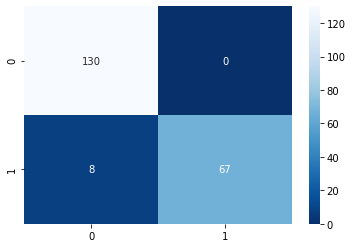

In [33]:
lr_con_mat = confusion_matrix(y_test,lr_pred)
print('Confusion Matrix: \n')
sns.heatmap(lr_con_mat,annot=True,cmap="Blues_r",fmt='.3g')

In [35]:
lr_cls_rep = classification_report(y_test,lr_pred)
print("Classification Report: \n",lr_cls_rep)

Classification Report: 
               precision    recall  f1-score   support

           2       0.94      1.00      0.97       130
           4       1.00      0.89      0.94        75

    accuracy                           0.96       205
   macro avg       0.97      0.95      0.96       205
weighted avg       0.96      0.96      0.96       205



In [36]:
lr_acc = accuracy_score(y_test,lr_pred)
print("Accuracy Score:",lr_acc)

Accuracy Score: 0.9609756097560975


## KNN Model

Confusion Matrix: 



<AxesSubplot:>

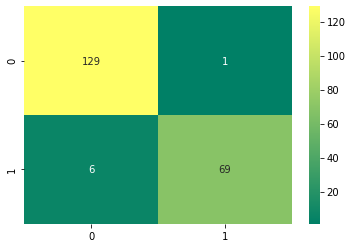

In [37]:
knn_con_mat = confusion_matrix(y_test,knn_pred)
print('Confusion Matrix: \n')
sns.heatmap(knn_con_mat,annot=True,cmap="summer",fmt='.3g')

In [38]:
knn_cls_rep = classification_report(y_test,knn_pred)
print("Classification Report: \n",knn_cls_rep)

Classification Report: 
               precision    recall  f1-score   support

           2       0.96      0.99      0.97       130
           4       0.99      0.92      0.95        75

    accuracy                           0.97       205
   macro avg       0.97      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205



In [39]:
knn_acc = accuracy_score(y_test,knn_pred)
print("Accuracy Score:",knn_acc)

Accuracy Score: 0.9658536585365853


## Naïve bayes model

Confusion Matrix: 



<AxesSubplot:>

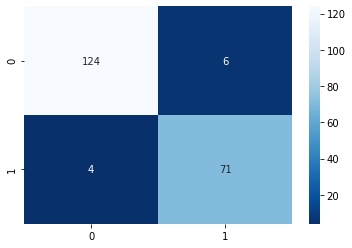

In [40]:
nb_con_mat = confusion_matrix(y_test,nb_pred)
print('Confusion Matrix: \n')
sns.heatmap(nb_con_mat,annot=True,cmap="Blues_r",fmt='.3g')

In [41]:
nb_cls_rep = classification_report(y_test,nb_pred)
print("Classification Report: \n",nb_cls_rep)

Classification Report: 
               precision    recall  f1-score   support

           2       0.97      0.95      0.96       130
           4       0.92      0.95      0.93        75

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [42]:
nb_acc = accuracy_score(y_test,nb_pred)
print("Accuracy Score:",nb_acc)

Accuracy Score: 0.9512195121951219


## Decision tree model

Confusion Matrix: 



<AxesSubplot:>

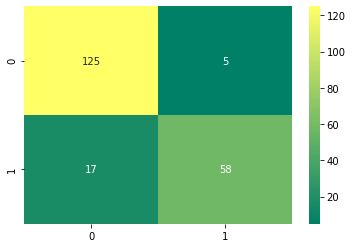

In [43]:
dt_con_mat = confusion_matrix(y_test,dt_pred)
print('Confusion Matrix: \n')
sns.heatmap(dt_con_mat,annot=True,cmap="summer",fmt='.3g')

In [44]:
dt_cls_rep = classification_report(y_test,dt_pred)
print("Classification Report: \n",dt_cls_rep)

Classification Report: 
               precision    recall  f1-score   support

           2       0.88      0.96      0.92       130
           4       0.92      0.77      0.84        75

    accuracy                           0.89       205
   macro avg       0.90      0.87      0.88       205
weighted avg       0.90      0.89      0.89       205



In [45]:
dt_acc = accuracy_score(y_test,dt_pred)
print("Accuracy Score:",dt_acc)

Accuracy Score: 0.8926829268292683
